In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("mnist_train.csv")

In [8]:
print(df.shape)

(59999, 785)


In [9]:
print(df.columns)

Index(['5', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.608', '0.609', '0.610', '0.611', '0.612', '0.613', '0.614', '0.615',
       '0.616', '0.617'],
      dtype='object', length=785)


In [10]:
df.head(15)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data = df.values

In [12]:
print(data.shape)

(59999, 785)


In [13]:
type(data)

numpy.ndarray

In [14]:
x = data[:,1:]
y = data[:, 0]

In [15]:
print(x.shape, y.shape)

(59999, 784) (59999,)


In [16]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
print(y)

[0 4 1 ... 5 6 8]


In [18]:
split = int(0.8 * x.shape[0])

In [19]:
split

47999

In [20]:
x_train = x[:split,:]
y_train = y[:split]

In [21]:
x_test = x[split:,:]
y_test = y[split:]

In [22]:
print(x_train.shape, y_train.shape)

(47999, 784) (47999,)


In [23]:
print(x_test.shape, y_test.shape)

(12000, 784) (12000,)


In [24]:
def drawImg(smp):
    img = smp.reshape((28,28))
    plt.imshow(img, cmap = 'grey')
    plt.show()

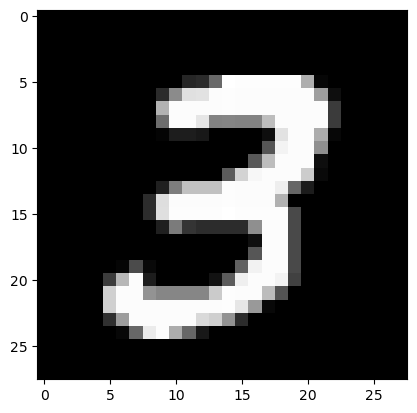

3


In [25]:
drawImg(x_train[6])
print(y_train[6])

In [26]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
#KNN
def KNN(x, y, querypnt, k=5):
    vals = []
    for i in range(x.shape[0]):
        d = distance(querypnt, x[i])
        vals.append((d,y[i]))
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    new_values = np.unique(vals[:,1], return_counts=True)
    print(new_values)
    index = new_values[1].argmax()
    pred = new_values[0][index]
    return pred

In [27]:
pred = KNN(x_train, y_train, x_test[52])

(array([6.]), array([5], dtype=int64))


In [28]:
pred

6.0

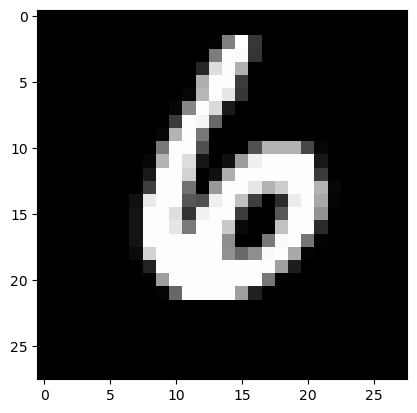

In [29]:
drawImg(x_test[52])

In [30]:
y_test[52]

6

In [31]:
from sklearn.metrics import accuracy_score

In [34]:
def get_accuracy(x_test,y_test):
    pred = []
    for i in range(x_test.shape[0]):
        pred.append(KNN(x_train,y_train,x_test[i]))
    pred = np.array(pred)
    return float((pred == y_test).sum())/x_test.shape[0]

In [38]:
accuracy = get_accuracy(x_test, y_test)
print("Accuracy:", accuracy)

(array([4.]), array([5], dtype=int64))
(array([7.]), array([5], dtype=int64))
(array([3., 8.]), array([2, 3], dtype=int64))
(array([8.]), array([5], dtype=int64))
(array([5.]), array([5], dtype=int64))
(array([6.]), array([5], dtype=int64))
(array([6.]), array([5], dtype=int64))
(array([8.]), array([5], dtype=int64))
(array([2.]), array([5], dtype=int64))
(array([2.]), array([5], dtype=int64))
(array([7.]), array([5], dtype=int64))
(array([8.]), array([5], dtype=int64))
(array([0.]), array([5], dtype=int64))
(array([4.]), array([5], dtype=int64))
(array([3.]), array([5], dtype=int64))
(array([4.]), array([5], dtype=int64))
(array([5.]), array([5], dtype=int64))
(array([2.]), array([5], dtype=int64))
(array([4.]), array([5], dtype=int64))
(array([2.]), array([5], dtype=int64))
(array([4., 9.]), array([2, 3], dtype=int64))
(array([8.]), array([5], dtype=int64))
(array([1.]), array([5], dtype=int64))


KeyboardInterrupt: 